In [1]:
def read_data(filename):
    with open(filename, 'r',encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

In [2]:
train_data = read_data('ratings_train.txt')
print(len(train_data))
train_data[:5]

150000


[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0'],
 ['9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'],
 ['6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1']]

In [3]:
test_data = read_data('ratings_test.txt')
print(len(test_data))
test_data[:5]

50000


[['6270596', '굳 ㅋ', '1'],
 ['9274899', 'GDNTOPCLASSINTHECLUB', '0'],
 ['8544678', '뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아', '0'],
 ['6825595', '지루하지는 않은데 완전 막장임... 돈주고 보기에는....', '0'],
 ['6723715', '3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??', '0']]

In [4]:
import konlpy

In [5]:
from konlpy.tag import Okt

In [6]:
okt=Okt()

In [7]:
import json
import os

def tokenize(doc):
    return['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [8]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
with open('train_docs.json', 'w',encoding='utf-8') as make_file:
    json.dump(train_docs, make_file, indent='\t', ensure_ascii=False)# json.dump 写入。  json.load 读取
with open('test_docs.json', 'w',encoding='utf-8') as make_file:
    json.dump(test_docs, make_file, indent='\t', ensure_ascii=False)

if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    with open('train_docs.json', 'w',encoding='utf-8') as make_file:
        json.dump(train_docs, make_file, indent='\t', ensure_ascii=False)
    with open('test_docs.json', 'w',encoding='utf-8') as make_file:
        json.dump(test_docs, make_file, indent='\t', ensure_ascii=False)

In [9]:
train_docs[0]

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')

In [10]:
tokens = [t for d in train_docs for t in d[0]]
len(tokens)

2159921

In [11]:
import nltk
text = nltk.Text(tokens, name='NMSC')
text

<Text: NMSC>

In [12]:
len(text.tokens)

2159921

In [13]:
len(set(text.tokens))

49895

In [14]:
text.vocab().most_common(50)

[('./Punctuation', 67778),
 ('영화/Noun', 50818),
 ('하다/Verb', 41209),
 ('이/Josa', 38540),
 ('보다/Verb', 38538),
 ('의/Josa', 30188),
 ('../Punctuation', 29055),
 ('가/Josa', 26627),
 ('에/Josa', 26468),
 ('을/Josa', 23118),
 ('.../Punctuation', 22795),
 ('도/Josa', 20037),
 ('은/Josa', 18435),
 ('들/Suffix', 18101),
 (',/Punctuation', 17643),
 ('는/Josa', 16819),
 ('없다/Adjective', 15635),
 ('를/Josa', 15632),
 ('있다/Adjective', 12496),
 ('좋다/Adjective', 12154),
 ('너무/Adverb', 11158),
 ('?/Punctuation', 11051),
 ('이/Determiner', 10928),
 ('재밌다/Adjective', 10410),
 ('정말/Noun', 9658),
 ('것/Noun', 9359),
 ('되다/Verb', 8867),
 ('!/Punctuation', 8421),
 ('진짜/Noun', 8358),
 ('같다/Adjective', 8347),
 ('적/Suffix', 8254),
 ('으로/Josa', 8029),
 ('이/Noun', 8001),
 ('점/Noun', 7932),
 ('아니다/Adjective', 7818),
 ('않다/Verb', 7723),
 ('로/Josa', 6997),
 ('에서/Josa', 6980),
 ('만/Josa', 6775),
 ('만들다/Verb', 6497),
 ('연기/Noun', 6434),
 ('나오다/Verb', 6410),
 ('평점/Noun', 6324),
 ('과/Josa', 6131),
 ('최고/Noun', 6005),
 ('~/Punc

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [16]:
font_fname = 'c:\windows\Fonts\gulim.ttc'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

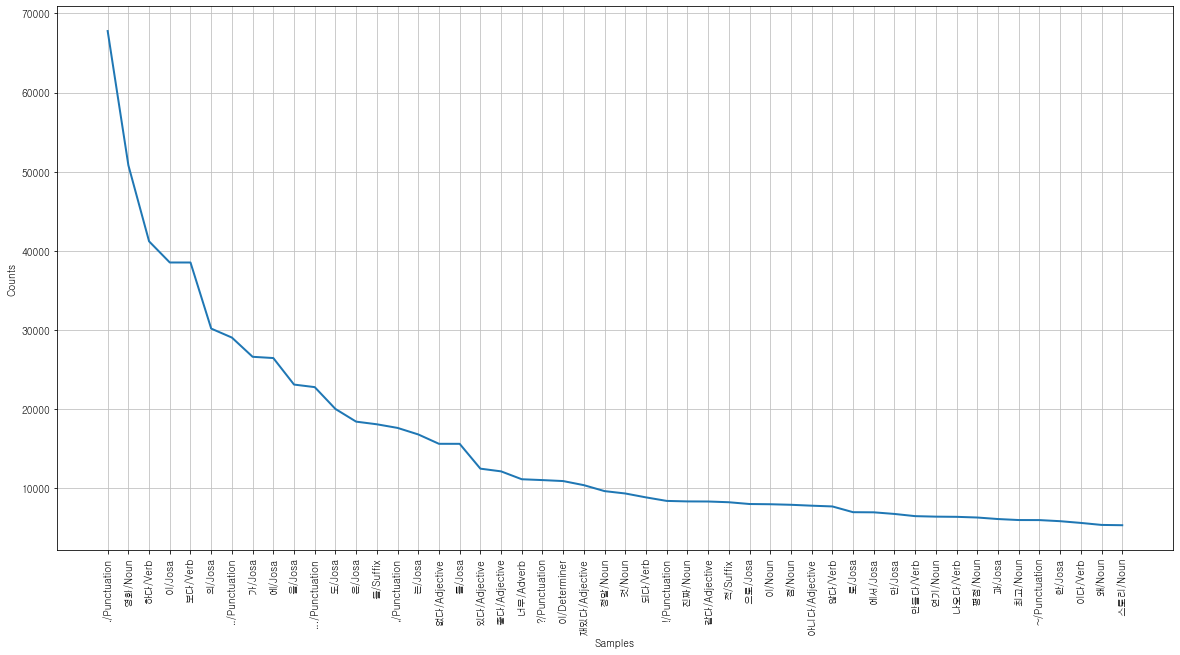

In [17]:
plt.figure(figsize=(20, 10))
text.plot(50)

In [18]:
feq_count = 100
selected_word = [f[0] for f in text.vocab().most_common(feq_count)]

In [19]:
def term_feq(doc):
    return [doc.count(word) for word in selected_word]

In [20]:
train_x = [term_feq(d) for d, _ in train_docs]

In [21]:
train_x[0]

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [22]:
train_y = [c for _, c in train_docs]
train_y[:5]

['0', '1', '0', '0', '1']

In [23]:
test_x = [term_feq(d) for d, _ in test_docs]
test_y = [c for _, c in test_docs]

In [24]:
import numpy as np

In [25]:
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

In [26]:
x_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [27]:
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

### 딥러닝으로 감성분석

In [28]:
!pip install tensorflow

In [29]:
!pip install keras

In [30]:
import tensorflow

In [31]:
from tensorflow.keras import models, layers, optimizers, losses,metrics

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(feq_count,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [34]:
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
293/293 [==============================] - 3s 2ms/step - loss: 0.5969 - binary_accuracy: 0.6712
Epoch 2/10
293/293 [==============================] - 0s 666us/step - loss: 0.5331 - binary_accuracy: 0.7113
Epoch 3/10
293/293 [==============================] - 0s 656us/step - loss: 0.5219 - binary_accuracy: 0.7202
Epoch 4/10
293/293 [==============================] - 0s 666us/step - loss: 0.5176 - binary_accuracy: 0.7218
Epoch 5/10
293/293 [==============================] - 0s 659us/step - loss: 0.5119 - binary_accuracy: 0.7247
Epoch 6/10
293/293 [==============================] - 0s 659us/step - loss: 0.5048 - binary_accuracy: 0.7311
Epoch 7/10
293/293 [==============================] - 0s 656us/step - loss: 0.5015 - binary_accuracy: 0.7339
Epoch 8/10
293/293 [==============================] - 0s 669us/step - loss: 0.5041 - binary_accuracy: 0.7304
Epoch 9/10
293/293 [==============================] - 0s 693us/step - loss: 0.5006 - binary_accuracy: 0.7337
Epoch 10/10
293/293 [

In [121]:
model.evaluate(x_test, y_test)

1563/1563 [==============================] - 1s 320us/step - loss: 0.5205 - binary_accuracy: 0.7178


[0.5205246210098267, 0.7178199887275696]

In [122]:
model.save('movie_review_model.h5')

In [137]:
s=[]
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_feq(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data))
    s.append(score)
    
    #if(score > 0.5):
        #print("[{}]는 {:.2f}%의 확률로 긍정리뷰네요!".format(review,score*100))
    #else:
        #print("[{}]는 {:.2f}%의 확률로 부정리뷰네요!".format(review,(1-score)*100))

In [138]:
predict_pos_neg("그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하")

In [139]:
import pandas as pd
from datetime import datetime
import numpy as np
import scipy as sp
import sklearn
import sys

In [140]:
df=pd.read_csv('카폐 크롤링 질문40000.csv')
df

,df_sum,comments_sum
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,['자이목스 블루 써보세요 \n좀 비싸지만 효과는 좋아요']['가격이 사악하긴하네욤...
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,['백합은 사람한테도 위험한 식물이기도 해요~']['저 타고양이카페에서 받은거에요!...
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,['공쥬님. 마니걱정되시는거 그맘알것같아요.\n젤좋은건 포획하셔서 중성화해주시구.\...
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,['나름 노는행동아닐까여^^\n저희냥이도 그래여~^^;\n전 저희냥이가 캣초딩아니고...
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",['아요~~이뻐라\n좀 지나면 쓸거예요']['과연... 언제부터 쓸까요.. ㅜㅜ ...


In [141]:
pd.DataFrame(df.df_sum.apply(lambda x: predict_pos_neg(x)))
#DataFrame.apply() 函数会遍历每一个元素，对元素运行指定的 function。

,df_sum
0,None
1,None
2,None
3,None
4,None
...,...
42376,None
42377,None
42378,None
42379,None


In [143]:
sentiment = pd.DataFrame(s)
sentiment

,0
0,0.605103
1,0.380732
2,0.153810
3,0.443952
4,0.371014
...,...
42377,0.891357
42378,0.278893
42379,0.138038
42380,0.347263


In [196]:
df=pd.read_csv('카폐 크롤링 질문40000.csv')
df

,df_sum,comments_sum
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,NoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNoneNo...
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,['자이목스 블루 써보세요 \n좀 비싸지만 효과는 좋아요']['가격이 사악하긴하네욤...
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,['백합은 사람한테도 위험한 식물이기도 해요~']['저 타고양이카페에서 받은거에요!...
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,['공쥬님. 마니걱정되시는거 그맘알것같아요.\n젤좋은건 포획하셔서 중성화해주시구.\...
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,['나름 노는행동아닐까여^^\n저희냥이도 그래여~^^;\n전 저희냥이가 캣초딩아니고...
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",['아요~~이뻐라\n좀 지나면 쓸거예요']['과연... 언제부터 쓸까요.. ㅜㅜ ...


In [194]:
sentiment

,0
0,0.605103
1,0.380732
2,0.153810
3,0.443952
4,0.371014
...,...
42377,0.891357
42378,0.278893
42379,0.138038
42380,0.347263


In [202]:
df.drop('comments_sum',axis=1,inplace=True)
df

,df_sum,sentiment
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,0.605103
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,0.380732
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,0.153810
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,0.443952
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,0.371014
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,0.623979
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,0.891357
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,0.278893
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",0.138038


In [203]:
df['sentiment']=sentiment
df

,df_sum,sentiment
0,그루밍 할때 깨물깨물저희 둘째가 그루밍을 할때\n혀로 빗고 털을 앙앙앙 깨물깨물 하...,0.605103
1,고양이 토 색좀 봐주세요 ㅠㅠ오늘 퇴근하고 털같은걸 토했길래 상황을 지켜봤는데 잘 ...,0.380732
2,다들 냥이들 보통 얼마나 자나요?저희 냥이가 길에서 살다가 약 2주 전부터 저희 집...,0.153810
3,제가 식중독 걸렸는데 애기 괜찮을까요 ㅜㅜ식중독은 처음 걸려보네요 ㅜㅜ\n고양이랑 ...,0.443952
4,고양이 귀염증 잘아시는분ㅠ..5마리 집사입니당 그중 한마리 고양이 귀 염증이 심하길...,0.371014
...,...,...
42376,편백나무액 냥이들에게 괜찮을까요?캣초딩 두마리 집사에요^^\n편백나무액을 구매했는데...,0.623979
42377,마당냥이 때문에 고민이 많습니다지난 여름부터 사료나 간식을 챙겨주던 냥이가 잇었는데...,0.891357
42378,놀다가 털썩 눕는행동 ? 4개월아가인데 사냥놀이하다가 갑자기 저렇게 털썩 누워요 \...,0.278893
42379,"숨숨집, 캣타워 전혀 사용을 안해요. ㅜㅜ4개월 아깽이 입니다... 캣타워 숨숨집 ...",0.138038


In [190]:
df.sentiment.mean()

0.3560014251875655